# Exploratory Data Analysis: L2_dec_roster

This notebook explores the `L2_dec_roster.csv` dataset in alignment with the research objectives on using SVM for poverty alleviation program analysis.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [3]:
import pandas as pd

#Load the L2_dec_roster.csv data into a DataFrame with proper encoding
df = pd.read_csv('../data/L2_dec_roster.csv', encoding='latin-1')
print(f"Data shape: {df.shape}")

#If latin-1 doesn't work, try these alternatives:

  # Alternative encodings to try:
df = pd.read_csv('../data/L2_dec_roster.csv', encoding='cp1252')
  # or
df = pd.read_csv('../data/L2_dec_roster.csv', encoding='iso-8859-1')

C:\Users\dadidelux\AppData\Local\Temp\ipykernel_6296\1757962246.py:4: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/L2_dec_roster.csv', encoding='latin-1')


Data shape: (584562, 69)


C:\Users\dadidelux\AppData\Local\Temp\ipykernel_6296\1757962246.py:10: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/L2_dec_roster.csv', encoding='cp1252')
C:\Users\dadidelux\AppData\Local\Temp\ipykernel_6296\1757962246.py:12: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/L2_dec_roster.csv', encoding='iso-8859-1')


## Display the First Few Rows and Data Types

In [4]:
# Display the first 5 rows
df.head()

,region_name,psgc_province,psgc_municipality,province_name,city_name,barangay_name,psgc_barangay,district,urb_rur,purok_sitio,...,type_of_household_id,server,hh_id,poverty_status2,no_of_indiv,no_of_families,indigenous,archive,poor,poverty_status
0,REGION IV-B [MIMAROPA],174000000,174001000,MARINDUQUE,BOAC (Capital),Agot,174001001,Lone,2,LANSONES,...,1,101,174001001-2-06393386,1,6,1,NaN,0,1,1 - Poor
1,REGION IV-B [MIMAROPA],174000000,174001000,MARINDUQUE,BOAC (Capital),Agot,174001001,Lone,2,MANGAHAN,...,1,101,174001001-2-06393389,0,5,1,NaN,0,0,0 - Non Poor
2,REGION IV-B [MIMAROPA],174000000,174001000,MARINDUQUE,BOAC (Capital),Agot,174001001,Lone,2,MANGGAHAN,...,1,101,174001001-2-06393391,0,2,1,NaN,0,0,0 - Non Poor
3,REGION IV-B [MIMAROPA],174000000,174001000,MARINDUQUE,BOAC (Capital),Agot,174001001,Lone,2,CHICO,...,1,101,174001001-2-06393498,1,4,1,NaN,0,1,1 - Poor
4,REGION IV-B [MIMAROPA],174000000,174001000,MARINDUQUE,BOAC (Capital),Agot,174001001,Lone,2,CHICO,...,1,101,174001001-2-06393499,0,2,1,NaN,0,0,0 - Non Poor


In [5]:
# Check data types and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584562 entries, 0 to 584561
Data columns (total 69 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   region_name               584562 non-null  object
 1   psgc_province             584562 non-null  int64 
 2   psgc_municipality         584562 non-null  int64 
 3   province_name             584562 non-null  object
 4   city_name                 584562 non-null  object
 5   barangay_name             584562 non-null  object
 6   psgc_barangay             584562 non-null  int64 
 7   district                  584562 non-null  object
 8   urb_rur                   584562 non-null  int64 
 9   purok_sitio               554215 non-null  object
 10  street_address            39798 non-null   object
 11  n_hh                      584562 non-null  int64 
 12  telephone                 439956 non-null  object
 13  l_stay                    584562 non-null  int64 
 14  no_s

region_name               0
psgc_province             0
psgc_municipality         0
province_name             0
city_name                 0
                      ...  
no_of_families            0
indigenous           474049
archive                   0
poor                      0
poverty_status            0
Length: 69, dtype: int64

## Identify and Handle Missing Values

In [6]:
# Count missing values per column
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False)

location_of_property    558184
street_address          544764
indigenous              474049
telephone               144606
purok_sitio              30347
dtype: int64

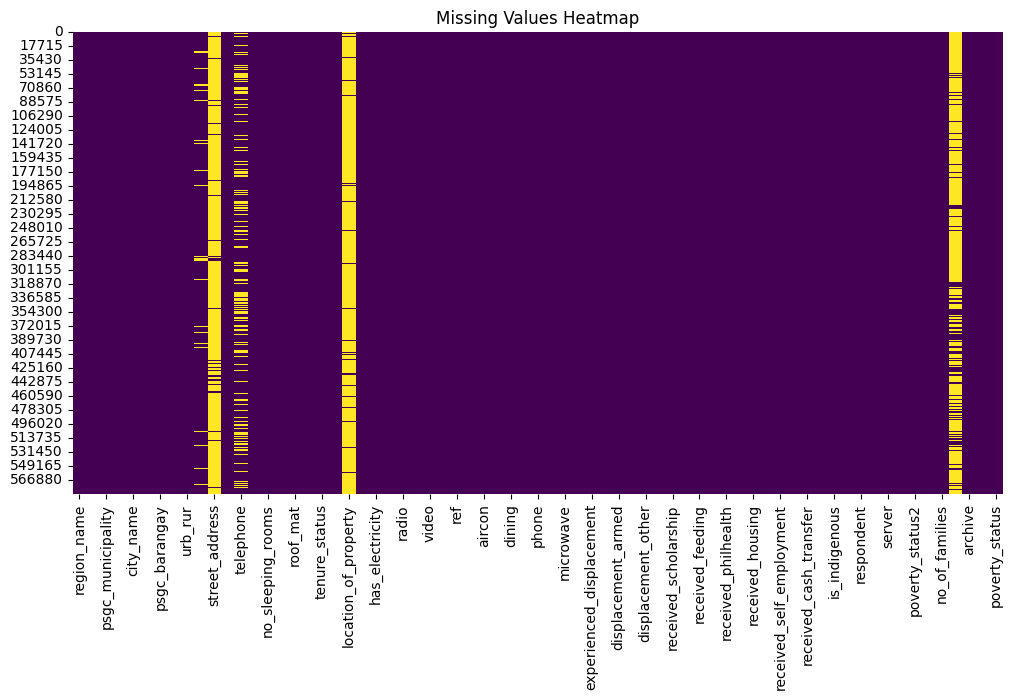

In [7]:
# Visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Handling Missing Values

- Review columns with significant missing data.
- Decide on strategies: drop, impute (mean/median/mode), or flag as unknown.
- Consider the impact on SVM modeling and research objectives.

## Summary Statistics for Numerical Columns

In [8]:
# Summary statistics for numerical columns
df.describe()

,psgc_province,psgc_municipality,psgc_barangay,urb_rur,n_hh,l_stay,no_sleeping_rooms,house_type,roof_mat,out_wall,...,is_indigenous,indigenous_group,respondent,type_of_household_id,server,poverty_status2,no_of_indiv,no_of_families,archive,poor
count,5.845620e+05,5.845620e+05,5.845620e+05,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,...,584562.000000,584562.00000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.0,584562.000000
mean,1.751861e+08,1.751955e+08,1.751955e+08,1.810915,1.067451,24.391758,1.503379,1.036396,1.880656,2.207542,...,1.810947,-47.63532,1.711050,1.096568,126.930829,0.697322,4.525855,1.077718,0.0,0.378615
std,4.243899e+05,4.262596e+05,4.262573e+05,0.391577,0.531087,18.946340,0.789462,0.244235,1.160136,1.252658,...,0.391551,123.05494,0.774919,0.302188,66.218518,0.727854,2.106728,0.304650,0.0,0.485042
min,1.740000e+08,1.740010e+08,1.740010e+08,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,-99.00000,0.000000,1.000000,39.000000,0.000000,1.000000,1.000000,0.0,0.000000
25%,1.752000e+08,1.752010e+08,1.752010e+08,2.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,-98.00000,1.000000,1.000000,101.000000,0.000000,3.000000,1.000000,0.0,0.000000
50%,1.752000e+08,1.752120e+08,1.752120e+08,2.000000,1.000000,21.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,-98.00000,2.000000,1.000000,106.000000,1.000000,4.000000,1.000000,0.0,0.000000
75%,1.753000e+08,1.753160e+08,1.753160e+08,2.000000,1.000000,37.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,-98.00000,2.000000,1.000000,219.000000,1.000000,6.000000,1.000000,0.0,1.000000
max,1.759000e+08,1.759170e+08,1.759170e+08,2.000000,20.000000,100.000000,10.000000,5.000000,6.000000,6.000000,...,2.000000,414.00000,99.000000,3.000000,219.000000,2.000000,22.000000,10.000000,0.0,1.000000


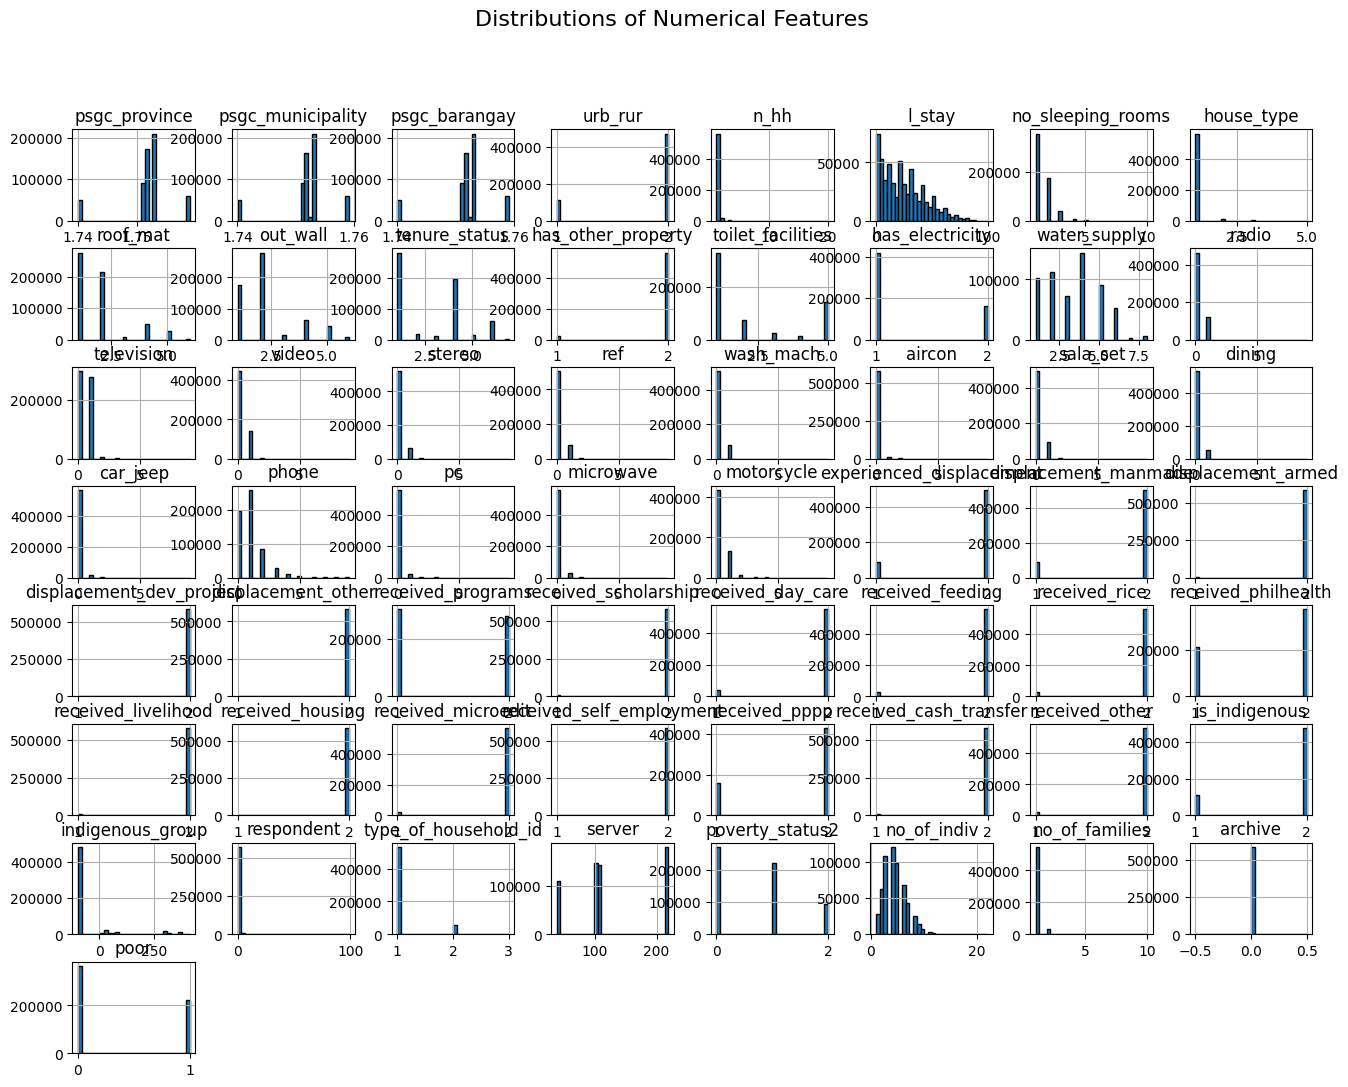

In [14]:
# Visualize distributions of numerical features
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

### Analysis of the Histogram Plot: "Distributions of Numerical Features"

The histogram plot presents the distribution of all numerical features in the dataset, with each feature shown in its own subplot. These histograms reveal the shape, spread, and central tendency of each variable, allowing for the identification of skewness, modality, and outliers.

- **'no_of_indiv' (number of individuals):** The distribution is right-skewed, indicating that most households have fewer individuals, but some have much larger sizes.
- **Other numerical features:** Distributions vary; some may appear approximately normal, while others are skewed or multimodal, reflecting the dataset's diversity.

These histograms help identify features that may require transformation or special handling before modeling (e.g., log transformation for skewed variables). This visualization complements the boxplot analysis by providing a broader overview of numerical data characteristics, supporting feature selection and preprocessing for poverty status prediction.

## Analyze Distributions of Categorical Data

In [15]:
# List categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['region_name', 'province_name', 'city_name', 'barangay_name',
       'district', 'purok_sitio', 'street_address', 'telephone',
       'location_of_property', 'hh_id', 'indigenous', 'poverty_status'],
      dtype='object')

In [16]:
# Show value counts for each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))


Column: region_name
region_name
REGION IV-B [MIMAROPA]    584562
Name: count, dtype: int64

Column: province_name
province_name
PALAWAN               209518
ORIENTAL MINDORO      173288
OCCIDENTAL MINDORO     91707
ROMBLON                59039
MARINDUQUE             51010
Name: count, dtype: int64

Column: city_name
city_name
PUERTO PRINCESA CITY (Capital)    33148
SAN JOSE                          25457
ROXAS                             25082
CITY OF CALAPAN (Capital)         22734
NAUJAN                            22629
SANTA CRUZ                        20597
PINAMALAYAN                       18156
BONGABONG                         16629
TAYTAY                            16595
BATARAZA                          16300
Name: count, dtype: int64

Column: barangay_name
barangay_name
Poblacion              13597
Santo Niño              4390
San Jose                3924
Rio Tuba                3832
San Isidro              3773
Tagumpay                3172
San Vicente             3156
Banca

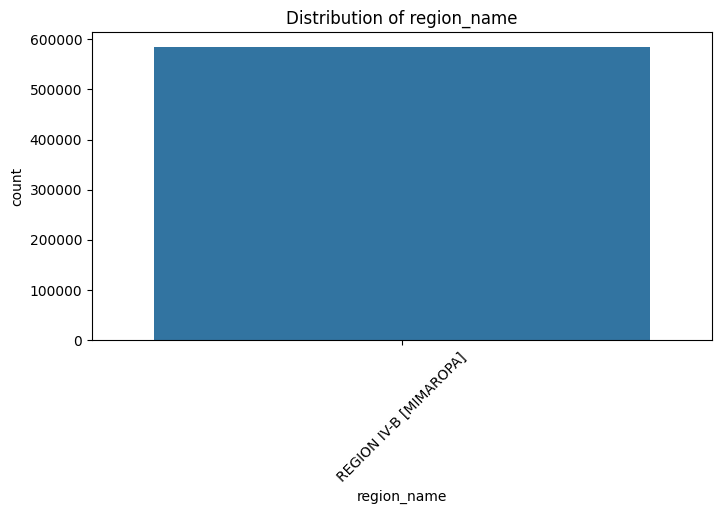

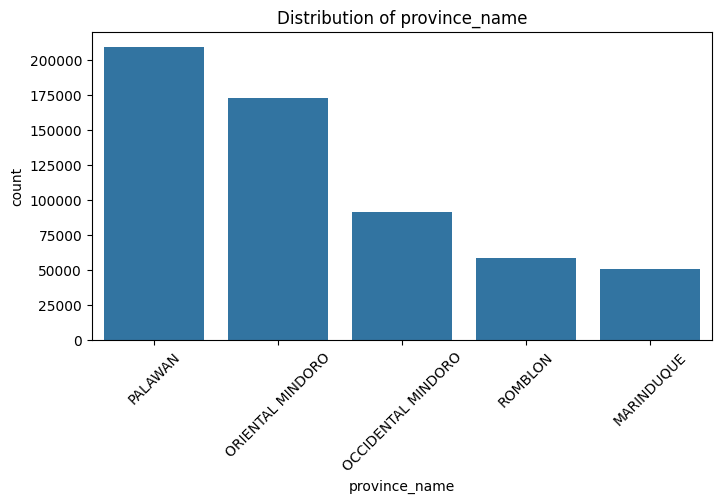

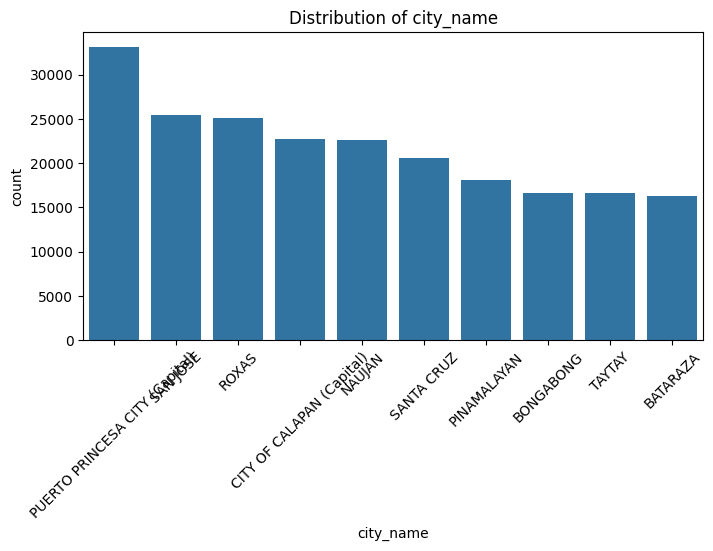

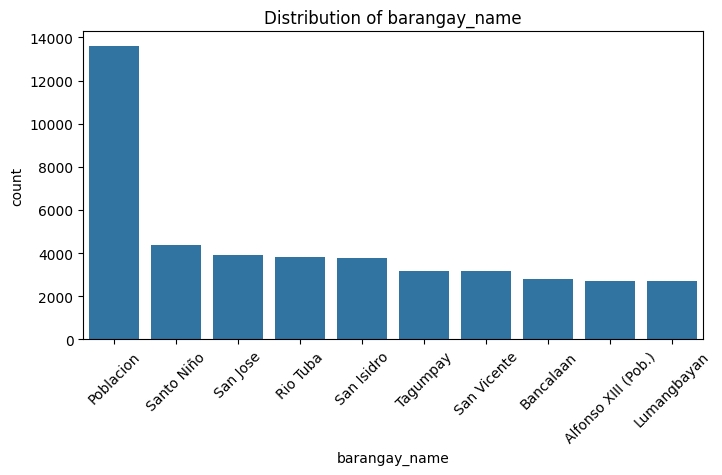

In [17]:
# Visualize distributions of top categorical features
for col in cat_cols[:4]:  # Show up to 4 most relevant categorical columns
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Analysis of the boxplot image titled "Boxplot of Number of Individuals by Poverty Status":

The plot compares the distribution of household sizes (number of individuals) between two groups: "Poor" (coded as 1) and "Non Poor" (coded as 0).

- The median household size is larger for the "Poor" group, approximately 5 individuals, compared to about 4 individuals for the "Non Poor" group.
- The interquartile range (IQR), representing the middle 50% of data, is wider for the "Poor" group, indicating more variability in household sizes among poor households.
- Both groups have outliers, with some households having significantly larger sizes (above 15 individuals), more pronounced in the "Poor" group.
- The whiskers extend further for the "Poor" group, showing a broader range of typical household sizes.
- This suggests that poverty status is associated with larger and more variable household sizes, which may impact resource needs and program targeting.

The visualization supports the hypothesis that household size is an important factor related to poverty status and should be considered in poverty alleviation program analysis.

## Visualizations for Key Variables

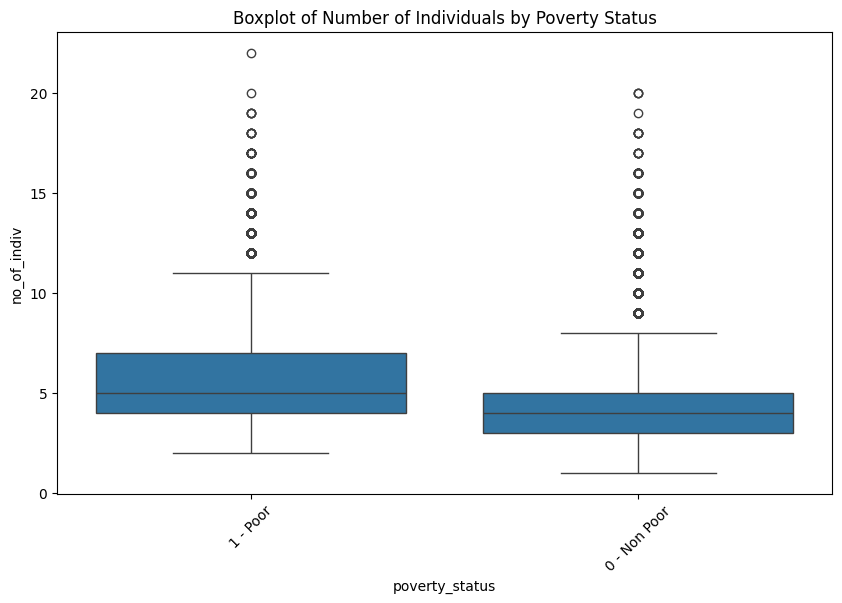

In [18]:
# Boxplot of number of individuals by poverty status
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='poverty_status', y='no_of_indiv')
plt.title('Boxplot of Number of Individuals by Poverty Status')
plt.xticks(rotation=45)
plt.show()

The plot generated in cell 19 is a boxplot showing the distribution of the number of individuals (`no_of_indiv`) in a household, grouped by `poverty_status`.

Analysis:
- Households classified as "1 - Poor" generally have a higher median number of individuals compared to "0 - Non Poor".
- The spread (interquartile range) for poor households is wider, indicating more variability in household size.
- There are more outliers (large households) among the poor group.
- This suggests that larger households are more likely to be classified as poor in this dataset.

This insight aligns with the positive correlation between `no_of_indiv` and poverty status observed in the correlation analysis. 

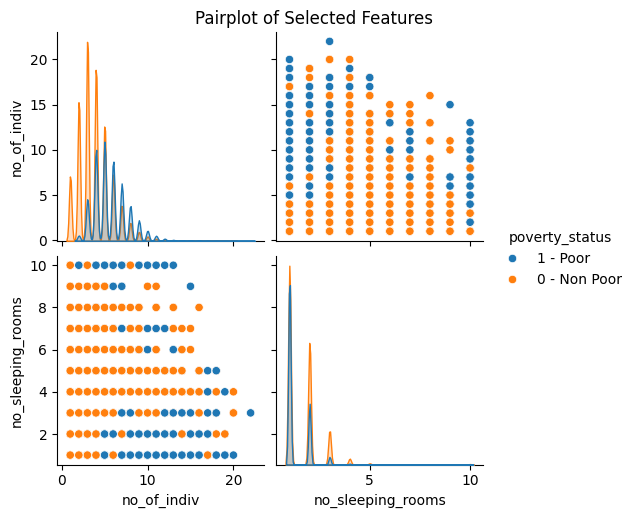

In [19]:
# Pairplot for selected features
selected_cols = ['no_of_indiv', 'no_sleeping_rooms', 'poverty_status']
sns.pairplot(df[selected_cols], hue='poverty_status')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [ ]:
# Summary statistics for numerical columns
df.describe()

,psgc_province,psgc_municipality,psgc_barangay,urb_rur,n_hh,l_stay,no_sleeping_rooms,house_type,roof_mat,out_wall,...,is_indigenous,indigenous_group,respondent,type_of_household_id,server,poverty_status2,no_of_indiv,no_of_families,archive,poor
count,5.845620e+05,5.845620e+05,5.845620e+05,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,...,584562.000000,584562.00000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.000000,584562.0,584562.000000
mean,1.751861e+08,1.751955e+08,1.751955e+08,1.810915,1.067451,24.391758,1.503379,1.036396,1.880656,2.207542,...,1.810947,-47.63532,1.711050,1.096568,126.930829,0.697322,4.525855,1.077718,0.0,0.378615
std,4.243899e+05,4.262596e+05,4.262573e+05,0.391577,0.531087,18.946340,0.789462,0.244235,1.160136,1.252658,...,0.391551,123.05494,0.774919,0.302188,66.218518,0.727854,2.106728,0.304650,0.0,0.485042
min,1.740000e+08,1.740010e+08,1.740010e+08,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,-99.00000,0.000000,1.000000,39.000000,0.000000,1.000000,1.000000,0.0,0.000000
25%,1.752000e+08,1.752010e+08,1.752010e+08,2.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,-98.00000,1.000000,1.000000,101.000000,0.000000,3.000000,1.000000,0.0,0.000000
50%,1.752000e+08,1.752120e+08,1.752120e+08,2.000000,1.000000,21.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,-98.00000,2.000000,1.000000,106.000000,1.000000,4.000000,1.000000,0.0,0.000000
75%,1.753000e+08,1.753160e+08,1.753160e+08,2.000000,1.000000,37.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,-98.00000,2.000000,1.000000,219.000000,1.000000,6.000000,1.000000,0.0,1.000000
max,1.759000e+08,1.759170e+08,1.759170e+08,2.000000,20.000000,100.000000,10.000000,5.000000,6.000000,6.000000,...,2.000000,414.00000,99.000000,3.000000,219.000000,2.000000,22.000000,10.000000,0.0,1.000000


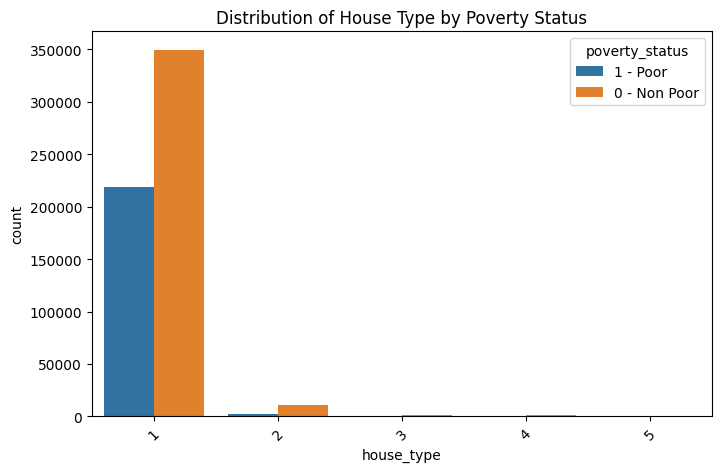

In [20]:
# Bar plot of house type with respect to poverty status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='house_type', hue='poverty_status')
plt.title('Distribution of House Type by Poverty Status')
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix

In [21]:
# Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,psgc_province,psgc_municipality,psgc_barangay,urb_rur,n_hh,l_stay,no_sleeping_rooms,house_type,roof_mat,out_wall,...,is_indigenous,indigenous_group,respondent,type_of_household_id,server,poverty_status2,no_of_indiv,no_of_families,archive,poor
psgc_province,1.000000,0.999918,0.999918,-0.076497,-0.013956,-0.118826,-0.009681,-0.000277,0.092113,0.041694,...,-0.127821,0.101175,-0.004601,-0.011571,-0.142116,0.043928,0.003106,-0.017342,NaN,0.050093
psgc_municipality,0.999918,1.000000,1.000000,-0.078211,-0.013983,-0.119247,-0.009470,-0.000121,0.092640,0.042284,...,-0.129161,0.102434,-0.004617,-0.011999,-0.143184,0.044134,0.003024,-0.017709,NaN,0.050390
psgc_barangay,0.999918,1.000000,1.000000,-0.078213,-0.013982,-0.119248,-0.009469,-0.000119,0.092640,0.042285,...,-0.129159,0.102433,-0.004617,-0.011998,-0.143185,0.044132,0.003024,-0.017708,NaN,0.050388
urb_rur,-0.076497,-0.078211,-0.078213,1.000000,-0.005129,0.046460,0.000014,-0.051641,0.008449,-0.026136,...,-0.074201,0.053025,0.007604,0.007472,0.387937,0.041459,0.013006,0.017586,NaN,0.064994
n_hh,-0.013956,-0.013983,-0.013982,-0.005129,1.000000,0.003060,0.041663,0.046792,-0.001250,-0.001170,...,0.005941,-0.001802,0.020667,0.078425,0.014809,-0.009270,0.035376,0.088335,NaN,-0.007108
l_stay,-0.118826,-0.119247,-0.119248,0.046460,0.003060,1.000000,0.139122,-0.035134,-0.069401,-0.047709,...,0.021188,-0.024361,-0.049467,0.122659,0.015146,-0.071816,-0.036712,0.110355,NaN,-0.114590
no_sleeping_rooms,-0.009681,-0.009470,-0.009469,0.000014,0.041663,0.139122,1.000000,0.010177,-0.145184,-0.148091,...,0.057101,-0.056949,0.075235,0.149002,0.016337,-0.111583,0.115457,0.145420,NaN,-0.180229
house_type,-0.000277,-0.000121,-0.000119,-0.051641,0.046792,-0.035134,0.010177,1.000000,-0.011506,-0.009878,...,0.025264,-0.019703,-0.001241,0.003463,-0.045144,-0.055229,-0.018103,0.001459,NaN,-0.068743
roof_mat,0.092113,0.092640,0.092640,0.008449,-0.001250,-0.069401,-0.145184,-0.011506,1.000000,0.537825,...,-0.068273,0.053337,-0.018536,-0.036646,0.031469,0.109726,0.021335,-0.032797,NaN,0.161134
out_wall,0.041694,0.042284,0.042285,-0.026136,-0.001170,-0.047709,-0.148091,-0.009878,0.537825,1.000000,...,-0.031285,0.019611,-0.007885,-0.024149,-0.000267,0.107670,0.032794,-0.023161,NaN,0.133729


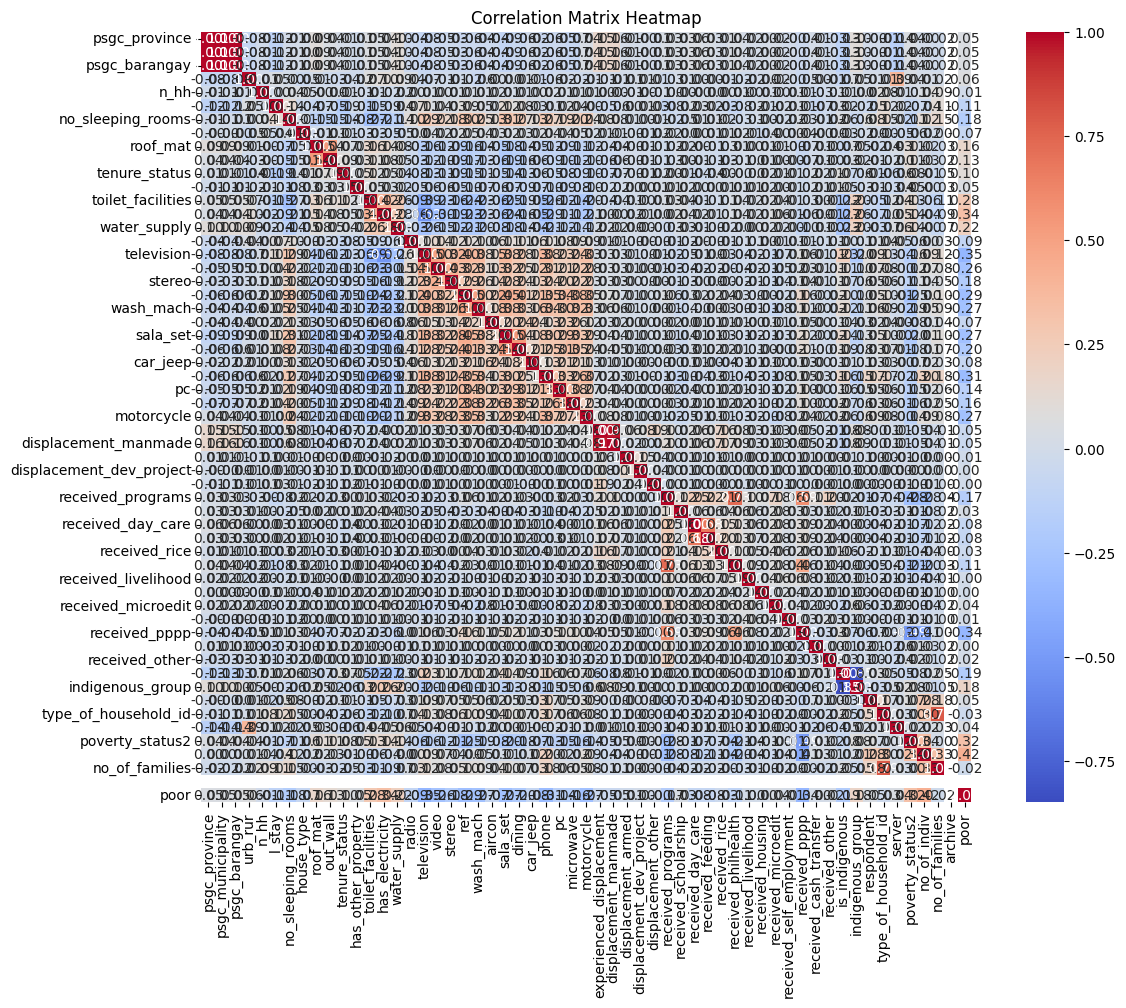

In [22]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

 Strong Positive Correlations (higher values = more likely to be poor):
  - no_of_indiv (0.424) - Household size - strongest predictor
  - has_electricity (0.336) - Lack of electricity access
  - poverty_status2 (0.325) - Alternative poverty measure
  - toilet_facilities (0.278) - Poor toilet facilities
  - water_supply (0.220) - Poor water access
  - indigenous_group (0.178) - Indigenous status
  - roof_mat (0.161) - Poor roofing materials
  - out_wall (0.134) - Poor wall materials

  Strong Negative Correlations (higher values = less likely to be poor):
  - received_pppp (-0.337) - 4Ps program participation - well-targeted
  - television (-0.347) - TV ownership
  - phone (-0.311) - Phone ownership
  - ref (-0.291) - Refrigerator ownership
  - motorcycle (-0.274) - Motorcycle ownership
  - sala_set (-0.272) - Living room furniture
  - wash_mach (-0.266) - Washing machine
  - video (-0.261) - Video player
  - received_programs (-0.174) - Any program participation

  Interpretation:
  - Demographics: Larger households more likely poor
  - Basic needs: Electricity, water, sanitation strongly linked to poverty
  - Assets: Appliances/electronics indicate non-poor status
  - Programs: Well-targeted to poor households (negative correlation expected)

## Identify Features for SVM Prediction

### Feature Selection Strategies
- Use correlation with the target variable (if known)
- Consider domain knowledge and research objectives
- Remove features with high missingness or low variance
- Consider encoding categorical variables for SVM

In [23]:
# List features with high correlation to poverty status (encoded as numeric)
# First encode poverty_status as numeric for correlation analysis
df_numeric = df.copy()
df_numeric['poverty_status_numeric'] = (df_numeric['poverty_status'] == '1 - Poor').astype(int)
correlations = df_numeric.corr(numeric_only=True)['poverty_status_numeric'].sort_values(ascending=False)
print("Correlations with poverty status:")
print(correlations)

Correlations with poverty status:
poor                        1.000000
poverty_status_numeric      1.000000
no_of_indiv                 0.423819
has_electricity             0.335814
poverty_status2             0.324605
toilet_facilities           0.277653
water_supply                0.219877
indigenous_group            0.177513
roof_mat                    0.161134
out_wall                    0.133729
tenure_status               0.101366
urb_rur                     0.064994
psgc_municipality           0.050390
psgc_barangay               0.050388
has_other_property          0.050213
psgc_province               0.050093
respondent                  0.046662
server                      0.042036
received_microedit          0.037881
received_scholarship        0.029349
received_other              0.016736
received_self_employment    0.005500
received_cash_transfer      0.004148
displacement_dev_project    0.001116
received_housing            0.000782
received_livelihood        -0.002109
disp

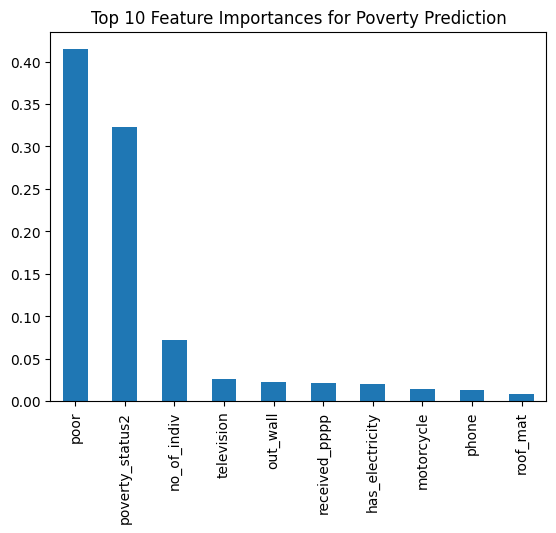

In [24]:
# Feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for modeling
df_model = df.dropna(subset=['poverty_status']).copy()

# Encode categorical variables
le_dict = {}
for col in df_model.select_dtypes(include=['object']).columns:
    if col != 'poverty_status':  # Don't encode target yet
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))
        le_dict[col] = le

# Encode target variable
y = (df_model['poverty_status'] == '1 - Poor').astype(int)
X = df_model.drop('poverty_status', axis=1)

# Fill any remaining NaN values
X = X.fillna(0)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances for Poverty Prediction')
plt.show()

## Explore Features Relevant to the 4Ps Program

- Identify features that align with the objectives of the 4Ps program.
- Visualize these features in relation to the target variable.
- Discuss how these features can inform the SVM model.

In [ ]:
# Visualize relevant 4Ps features - access to electricity by poverty status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='has_electricity', hue='poverty_status')
plt.title('Access to Electricity by Poverty Status')
plt.xlabel('Has Electricity (1=Yes, 2=No)')
plt.show()

# Water supply by poverty status
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='water_supply', hue='poverty_status')
plt.title('Water Supply Type by Poverty Status')
plt.xticks(rotation=45)
plt.show()

## Document Insights and Observations

- Summarize key findings from the EDA.
- Discuss implications for SVM modeling and the 4Ps program.